## What's Cooking?

Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

Acknowledgements
We want to thank Yummly for providing this unique dataset. Kaggle is hosting this playground competition for fun and practice.

In the dataset, we include the recipe id, the type of cuisine, and the list of ingredients of each recipe (of variable length). The data is stored in JSON format. 

An example of a recipe node in train.json:

 {
 "id": 24717,
 "cuisine": "indian",
 "ingredients": [
     "tumeric",
     "vegetable stock",
     "tomatoes",
     "garam masala",
     "naan",
     "red lentils",
     "red chili peppers",
     "onions",
     "spinach",
     "sweet potatoes"
 ]
 },
In the test file test.json, the format of a recipe is the same as train.json, only the cuisine type is removed, as it is the target variable you are going to predict.

In [ ]:
### Importing all the necessary librariers ###

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer

In [355]:
### Create dataset out of data file for training ###

df_train = pd.read_json("train.json")
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [356]:
### Desribe training dataset ###

df_train.describe(include='all')

,cuisine,id,ingredients
count,39774,39774.000000,39774
unique,20,NaN,39674
top,italian,NaN,"[cold water, lime, sugar, sweetened condensed ..."
freq,7838,NaN,3
mean,NaN,24849.536959,NaN
std,NaN,14360.035505,NaN
min,NaN,0.000000,NaN
25%,NaN,12398.250000,NaN
50%,NaN,24887.000000,NaN
75%,NaN,37328.500000,NaN


Text(0.5, 1.0, 'Number of receipts in the dataset')

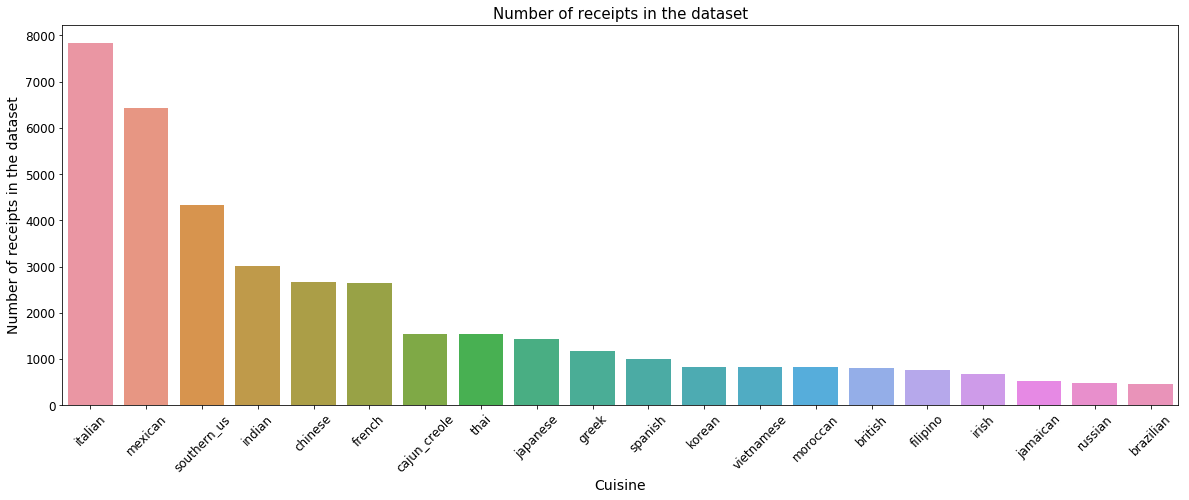

In [371]:
### Desribe training dataset ###

df_train_receipts = df_train.groupby(['cuisine'])['id'].count().to_frame().reset_index().rename(columns={'id':'number_of_receipts'}).sort_values('number_of_receipts', ascending = False)

plt.figure(figsize=(20,7))

ax = sns.barplot(x=df_train_receipts['cuisine'], y=df_train_receipts['number_of_receipts'])
plt.xticks(rotation=45, size = 12)
plt.xlabel('Cuisine', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of receipts in the dataset', size = 14)

plt.title('Number of receipts in the dataset', size = 15)

In [372]:
### Prepare the average number of ingredients per one receipt ###

number_of_ingred = []
for i in range(len(df_train)):
    ingred = df_train['ingredients'].values[i]
    number_of_ingred.append(len(ingred))
    
df_train['number_of_ingred'] = number_of_ingred

In [373]:
df_mean_ingred = df_train.groupby('cuisine')['number_of_ingred'].mean().to_frame().reset_index().sort_values('number_of_ingred',ascending=False)
df_mean_ingred

,cuisine,number_of_ingred
14,moroccan,12.909866
7,indian,12.705961
19,vietnamese,12.675152
2,cajun_creole,12.617076
18,thai,12.545809
10,jamaican,12.214829
3,chinese,11.982791
12,korean,11.284337
13,mexican,10.877446
17,spanish,10.423660


Text(0.5, 1.0, 'Number of average number of ingredients per one receipe')

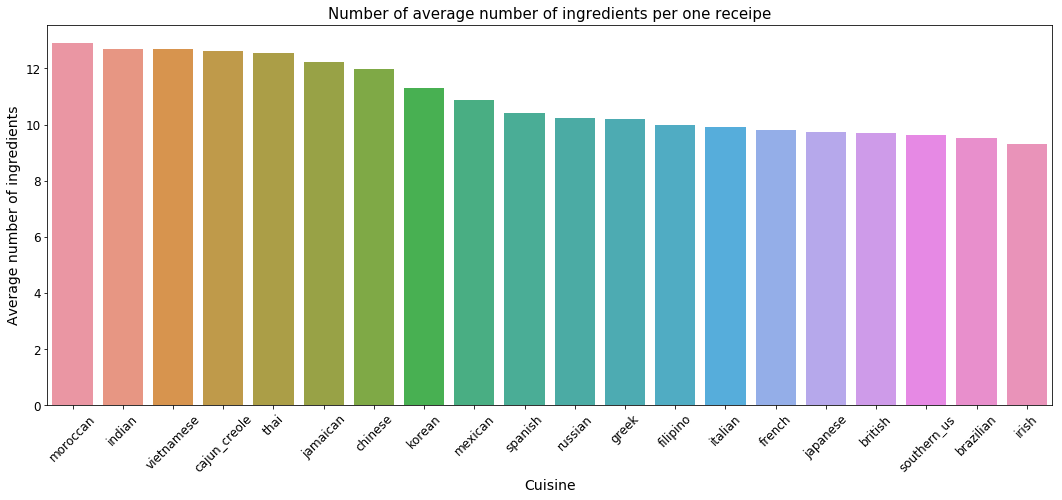

In [374]:
plt.figure(figsize=(18,7))

ax = sns.barplot(x=df_mean_ingred['cuisine'], y=df_mean_ingred['number_of_ingred'])
plt.xticks(rotation=45, size = 12)
plt.xlabel('Cuisine', size = 14)
plt.yticks(size = 12)
plt.ylabel('Average number of ingredients', size = 14)

plt.title('Number of average number of ingredients per one receipe', size = 15)

In [376]:
### Number of unique ingredients per cuisine ###

dictCuisineIngred = {}
cuisines = []
ingredients = []

for i in range(len(df_train)):
    cuisine = df_train['cuisine'][i]
    ingredientsPerCuisine = df_train['ingredients'][i]
    
    if cuisine not in dictCuisineIngred.keys():
        cuisines.append(cuisine)
        dictCuisineIngred[cuisine] = ingredientsPerCuisine
    else: 
        ingredList = dictCuisineIngred[cuisine]
        ingredList.extend(ingredientsPerCuisine)
        ingredList = list(set(ingredList))
        dictCuisineIngred[cuisine] = ingredList

        ingredients.extend(ingredientsPerCuisine)

In [377]:
dictNunberOfIngred = {}

for cuisine in list(dictCuisineIngred.keys()):
    dictNunberOfIngred[cuisine] = len(dictCuisineIngred[cuisine])

df_number_of_inger = pd.DataFrame.from_dict(dictNunberOfIngred, orient='index', columns = ['no of ingred.']).reset_index().rename(columns={'index':'cuisine'})
df_number_of_inger = df_number_of_inger.sort_values('no of ingred.', ascending=False)

Text(0.5, 1.0, 'Number of unique ingredients per cuisine')

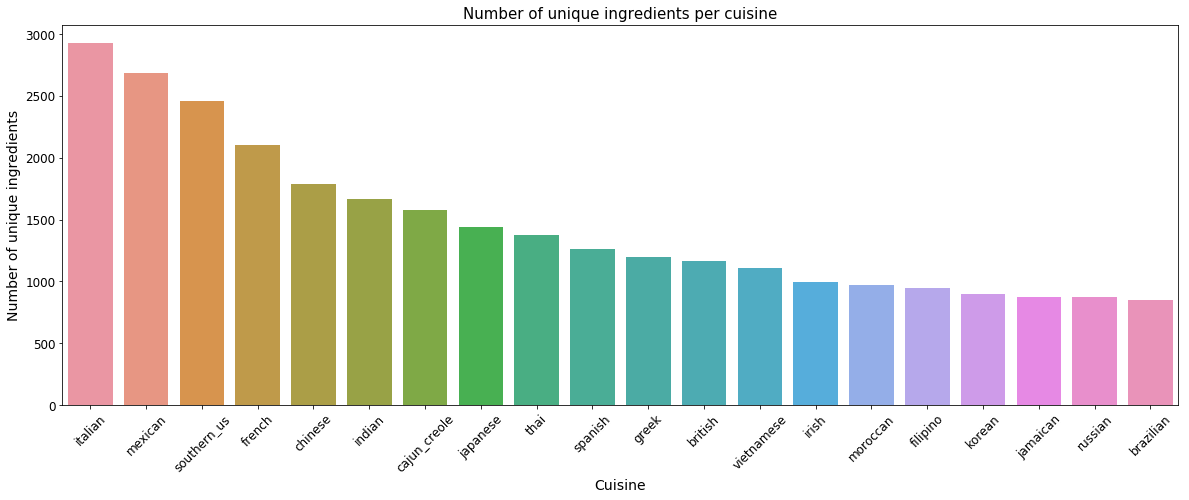

In [379]:
plt.figure(figsize=(20,7))

ax = sns.barplot(x=df_number_of_inger['cuisine'], y=df_number_of_inger['no of ingred.'])
plt.xticks(rotation=45, size = 12)
plt.xlabel('Cuisine', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of unique ingredients', size = 14)

plt.title('Number of unique ingredients per cuisine', size=15)

In [380]:
df_train['ingredients_string'] = [' , '.join(z).strip() for z in df_train['ingredients']]  
df_train.head()

,cuisine,id,ingredients,number_of_ingred,ingredients_string
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,"romaine lettuce , black olives , grape tomatoe..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,"plain flour , ground pepper , salt , tomatoes ..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,"eggs , pepper , salt , mayonaise , cooking oil..."
3,indian,22213,"[water, vegetable oil, wheat, salt, black pepp...",4,"water , vegetable oil , wheat , salt , black p..."
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,"black pepper , shallots , cornflour , cayenne ..."


In [381]:
dff_train = df_train.set_index(['cuisine', 'id'])['ingredients'].apply(pd.Series).stack()
dff_train = dff_train.reset_index()
dff_train.columns = ['cuisine','id','ingred_id','ingredients']

dff_train.head()

,cuisine,id,ingred_id,ingredients
0,greek,10259,0,romaine lettuce
1,greek,10259,1,black olives
2,greek,10259,2,grape tomatoes
3,greek,10259,3,garlic
4,greek,10259,4,pepper


In [382]:
dummies = pd.get_dummies(dff_train['ingredients'])
df_dummies = pd.concat([dff_train, dummies], axis=1)
df_dummies = df_dummies.drop(columns = ['ingred_id', 'ingredients'], axis=1)
df_dummies = df_dummies.drop_duplicates(keep='first', inplace=False)

df_dummies.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [383]:
df_top_grouped = df_dummies.groupby(['cuisine','id']).sum().reset_index()
df_top_grouped.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,brazilian,203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brazilian,415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brazilian,550,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brazilian,605,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brazilian,623,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [384]:
df_top_grouped_cuisine = df_top_grouped.groupby(['cuisine']).sum().drop(['id'], axis=1)
df_top_grouped_cuisine.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
cajun_creole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0
filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [ ]:
top5Ingres = []

for i in range(len(df)):
    ingred = df['ingredients'].values[i]
    number_of_ingred.append(len(ingred))
    
df_train['number_of_ingred'] = number_of_ingred

In [ ]:
df_top_grouped_cuisine.loc['brazilian'].sort_values(ascending=False).to_frame()

In [307]:
for i in df_top_grouped_cuisine.index:
    print(i)

brazilian
british
cajun_creole
chinese
filipino
french
greek
indian
irish
italian
jamaican
japanese
korean
mexican
moroccan
russian
southern_us
spanish
thai
vietnamese


In [340]:
brazilian = df_top_grouped_cuisine.loc['brazilian'].sort_values(ascending=False).to_frame()
brazilian['%'] = round(100* brazilian['brazilian'] / brazilian['brazilian'].sum(),2)
brazilian.head(5)

,brazilian,%
salt,194.0,4.35
onions,134.0,3.00
olive oil,118.0,2.64
lime,89.0,1.99
water,87.0,1.95


In [341]:
british = df_top_grouped_cuisine.loc['british'].sort_values(ascending=False).to_frame()
british['%'] = round(100* british['british'] / british['british'].sum(),2)
british.head(5)

,british,%
salt,407.0,5.21
all-purpose flour,238.0,3.05
butter,223.0,2.85
milk,202.0,2.59
unsalted butter,191.0,2.44


In [342]:
cajun_creole = df_top_grouped_cuisine.loc['cajun_creole'].sort_values(ascending=False).to_frame()
cajun_creole['%'] = round(100* cajun_creole['cajun_creole'] / cajun_creole['cajun_creole'].sum(),2)
cajun_creole.head(5)

,cajun_creole,%
salt,743.0,3.81
onions,529.0,2.71
garlic,370.0,1.90
green bell pepper,336.0,1.72
butter,334.0,1.71


In [343]:
chinese = df_top_grouped_cuisine.loc['chinese'].sort_values(ascending=False).to_frame()
chinese['%'] = round(100* chinese['chinese'] / chinese['chinese'].sum(),2)
chinese.head(5)

,chinese,%
soy sauce,1364.0,4.26
sesame oil,915.0,2.86
salt,907.0,2.83
corn starch,906.0,2.83
sugar,824.0,2.57


In [345]:
filipino = df_top_grouped_cuisine.loc['filipino'].sort_values(ascending=False).to_frame()
filipino['%'] = round(100* filipino['filipino'] / filipino['filipino'].sum(),2)
filipino.head(5)

,filipino,%
salt,421.0,5.57
garlic,325.0,4.30
onions,310.0,4.10
water,310.0,4.10
soy sauce,251.0,3.32


In [346]:
french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,french,%
salt,1203.0,4.63
sugar,637.0,2.45
all-purpose flour,593.0,2.28
unsalted butter,592.0,2.28
olive oil,516.0,1.99


In [347]:
greek = df_top_grouped_cuisine.loc['greek'].sort_values(ascending=False).to_frame()
greek['%'] = round(100* greek['greek'] / greek['greek'].sum(),2)
greek.head(5)

,greek,%
salt,572.0,4.78
olive oil,503.0,4.21
dried oregano,266.0,2.22
garlic cloves,253.0,2.12
feta cheese crumbles,252.0,2.11


In [348]:
indian = df_top_grouped_cuisine.loc['indian'].sort_values(ascending=False).to_frame()
indian['%'] = round(100* indian['indian'] / indian['indian'].sum(),2)
indian.head(5)

,indian,%
salt,1934.0,5.07
onions,1196.0,3.13
garam masala,863.0,2.26
water,820.0,2.15
ground turmeric,728.0,1.91


In [350]:
irish = df_top_grouped_cuisine.loc['irish'].sort_values(ascending=False).to_frame()
irish['%'] = round(100* irish['irish'] / irish['irish'].sum(),2)
irish.head(5)

,irish,%
salt,376.0,6.05
all-purpose flour,220.0,3.54
butter,219.0,3.52
onions,132.0,2.12
potatoes,120.0,1.93


In [351]:
italian = df_top_grouped_cuisine.loc['italian'].sort_values(ascending=False).to_frame()
italian['%'] = round(100* italian['italian'] / italian['italian'].sum(),2)
italian.head(5)

,italian,%
salt,3454.0,4.45
olive oil,3111.0,4.01
garlic cloves,1619.0,2.08
grated parmesan cheese,1579.0,2.03
garlic,1472.0,1.90


In [318]:
df_top_grouped_cuisine.loc['jamaican'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,jamaican
salt,332.0
onions,173.0
water,153.0
garlic,140.0
ground allspice,128.0


In [319]:
df_top_grouped_cuisine.loc['japanese'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,japanese
soy sauce,561.0
salt,423.0
mirin,402.0
sugar,401.0
water,383.0


In [322]:
df_top_grouped_cuisine.loc['korean'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,korean
soy sauce,427.0
sesame oil,403.0
garlic,303.0
green onions,293.0
sugar,266.0


In [323]:
df_top_grouped_cuisine.loc['mexican'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,mexican
salt,2720.0
onions,1494.0
ground cumin,1347.0
garlic,1318.0
olive oil,1289.0


In [329]:
df_top_grouped_cuisine.loc['moroccan'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,moroccan
salt,414.0
olive oil,413.0
ground cumin,348.0
onions,280.0
ground cinnamon,223.0


In [330]:
df_top_grouped_cuisine.loc['russian'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,russian
salt,288.0
sugar,156.0
onions,146.0
all-purpose flour,123.0
sour cream,117.0


In [331]:
df_top_grouped_cuisine.loc['southern_us'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,southern_us
salt,2290.0
butter,1255.0
all-purpose flour,1222.0
sugar,1054.0
large eggs,746.0


In [332]:
df_top_grouped_cuisine.loc['spanish'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,spanish
salt,460.0
olive oil,387.0
garlic cloves,290.0
extra-virgin olive oil,255.0
onions,253.0


In [333]:
df_top_grouped_cuisine.loc['thai'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,thai
fish sauce,625.0
garlic,414.0
salt,396.0
coconut milk,353.0
vegetable oil,335.0


In [334]:
df_top_grouped_cuisine.loc['vietnamese'].sort_values(ascending=False).head(5).to_frame()

french = df_top_grouped_cuisine.loc['french'].sort_values(ascending=False).to_frame()
french['%'] = round(100* french['french'] / french['french'].sum(),2)
french.head(5)

,vietnamese
fish sauce,392.0
sugar,344.0
salt,264.0
garlic,239.0
water,227.0
